In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_investors = pd.read_csv("data/data_cb/investors.csv")

In [3]:
df_investors.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,6766.0,2007-05-26 02:30:28,2018-10-27 00:29:49,"investor,company",zoho.com,...,5.0,NaN,NaN,NaN,1996-09-15,NaN,http://www.facebook.com/zoho,http://www.linkedin.com/company/zoho-corporati...,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...
1,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,88317.0,2007-05-26 03:21:34,2019-06-19 12:17:48,investor,omidyar.com,...,318.0,NaN,NaN,NaN,2004-01-01,NaN,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...
2,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,organization,facebook,https://www.crunchbase.com/organization/facebook,25.0,2007-05-26 04:22:15,2021-05-17 14:06:02,"investor,company",facebook.com,...,37.0,1.612282e+10,1.612282e+10,USD,2004-02-04,NaN,https://www.facebook.com/facebook,http://www.linkedin.com/company/facebook,https://twitter.com/facebook,https://res.cloudinary.com/crunchbase-producti...
3,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,person,mark-zuckerberg,https://www.crunchbase.com/person/mark-zuckerberg,2220.0,2007-05-26 04:51:46,2018-12-13 14:05:34,investor,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/zuck,NaN,https://twitter.com/finkd,https://res.cloudinary.com/crunchbase-producti...
4,084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin Moskovitz,person,dustin-moskovitz,https://www.crunchbase.com/person/dustin-mosko...,93903.0,2007-05-26 05:15:05,2019-06-07 20:29:51,investor,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,http://www.facebook.com/moskov,https://www.linkedin.com/in/dmoskov,http://twitter.com/moskov,https://res.cloudinary.com/crunchbase-producti...


In [4]:
df_investors.loc[0]

uuid                                        bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7
name                                                                        Zoho
type                                                                organization
permalink                                                                   zoho
cb_url                              https://www.crunchbase.com/organization/zoho
rank                                                                      6766.0
created_at                                                   2007-05-26 02:30:28
updated_at                                                   2018-10-27 00:29:49
roles                                                           investor,company
domain                                                                  zoho.com
country_code                                                                 USA
state_code                                                                    CA
region                      

In [5]:
df_investors.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'roles', 'domain', 'country_code', 'state_code', 'region',
       'city', 'investor_types', 'investment_count', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'closed_on', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url'],
      dtype='object')

In [6]:
len(df_investors)

185784

In [7]:
df = df_investors[['type', 'roles', 'country_code']]
df['roles'] = ["investor,company" if i=='company,investor' else i for i in df["roles"] ] 

<ipython-input-7-927da6264c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roles'] = ["investor,company" if i=='company,investor' else i for i in df["roles"] ]


In [8]:
len_df = len(df)

### Type

In [9]:
count_type = df.groupby(['type']).count() # count number of investors for each type
count_type = count_type.rename(columns={'roles':'count'}) # rename columns
count_type['percentage'] = count_type['count']/count_type['count'].sum()*100
count_type['percentage'] = count_type['percentage'].round(2)
count_type

,count,country_code,percentage
type,,,
organization,78001,62035,41.98
person,107783,63806,58.02


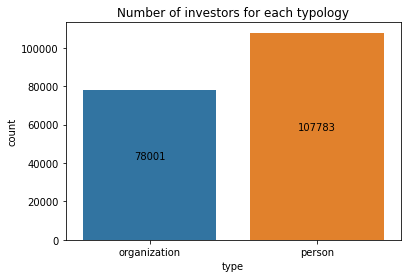

In [10]:
a = sns.barplot(x='type', y='count', data=count_type.reset_index())

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2. ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of investors for each typology")
plt.savefig("plots/investors/count_type.pdf")
plt.show()

### Roles

In [11]:
count_roles = df[['roles', 'type']].groupby(['roles']).count() # count number of investors for each type
count_roles = count_roles.rename(columns={'type':'count'}) # rename columns
count_roles['percentage'] = count_roles['count']/count_type['count'].sum()*100 # find percentage
count_roles['percentage'] = count_roles['percentage'].round(2) # appriximate 

count_roles.head()

,count,percentage
roles,,
"company,investor,school",2,0.00
investor,161843,87.11
"investor,company",23510,12.65
"investor,company,school",111,0.06
"investor,school",288,0.16


In [12]:
len(count_roles)

8

In [13]:
thresold = len_df/10

# delete values too low
sum_low = count_roles['count'][count_roles['count'] < thresold].sum()
per_low = count_roles['percentage'][count_roles['count'] < thresold].sum()
count_roles = count_roles[count_roles['count'] > thresold]
s = pd.DataFrame([[sum_low, per_low, 'other']], columns=['count', 'percentage', 'roles'])
s = s.set_index('roles')
count_roles = count_roles. append(s)
count_roles.head()

,count,percentage
roles,,
investor,161843,87.11
"investor,company",23510,12.65
other,431,0.23


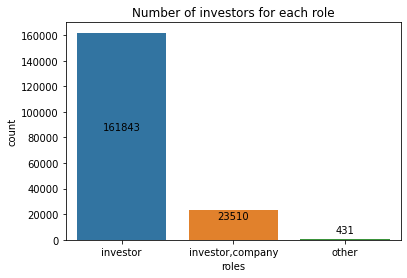

In [14]:
a = sns.barplot(x='roles', y='count', data=count_roles.reset_index())
#for index, row in count_type.iterrows():
#    a.text(index, row.count, f"{row.percentage}%" , color='black', ha="center")

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2. ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of investors for each role")
plt.savefig("plots/investors/count_roles.pdf")
plt.show()

### Country

In [15]:
count_country = df[['type', 'country_code']].groupby(['country_code']).count() # count number of investors for each type
count_country = count_country.rename(columns={'type':'count'}) # rename columns
count_country['percentage'] = count_country['count']/count_type['count'].sum()*100 # find percentage
count_country['percentage'] = count_country['percentage'].round(2) # appriximate 

count_country.head()

,count,percentage
country_code,,
AFG,1,0.00
AGO,7,0.00
ALA,1,0.00
ALB,13,0.01
AND,6,0.00


In [16]:
thresold = len_df/40

# delete values too low
sum_low = count_country['count'][count_country['count'] < thresold].sum()
per_low = count_country['percentage'][count_country['count'] < thresold].sum()
count_country = count_country[count_country['count'] > thresold]
s = pd.DataFrame([[sum_low, per_low, 'other']], columns=['count', 'percentage', 'country_code'])
s = s.set_index('country_code')
count_country = count_country. append(s)
count_country = count_country.sort_values(by='count', ascending=False)
count_country.head()

,count,percentage
country_code,,
USA,55025,29.62
other,42522,22.80
CHN,13076,7.04
GBR,9730,5.24
IND,5488,2.95


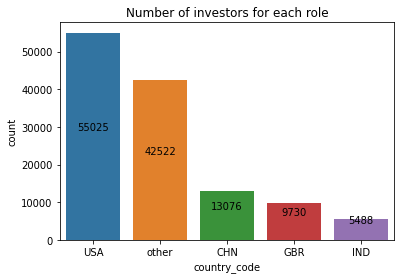

In [17]:
a = sns.barplot(x='country_code', y='count', data=count_country.reset_index())
#for index, row in count_type.iterrows():
#    a.text(index, row.count, f"{row.percentage}%" , color='black', ha="center")

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2. ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of investors for each role")
plt.savefig("plots/investors/city.pdf")
plt.show()

## Switzerland

In [18]:
df_ch = df_investors[df_investors['country_code']=='CHE']
df_ch.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,roles,domain,...,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
347,46ef43b2-49ba-8d1d-7687-b692b010c772,Armada Investment AG,organization,armada-investment-group,https://www.crunchbase.com/organization/armada...,140477.0,2007-07-20 13:10:31,2020-03-03 16:48:12,investor,armada.com,...,14.0,NaN,NaN,NaN,2000-03-08,NaN,NaN,https://www.linkedin.com/company/armada-invest...,NaN,https://res.cloudinary.com/crunchbase-producti...
702,d2712549-89f1-0f55-4ac9-c220f4772ff8,lastminute.com group,organization,lastminute,https://www.crunchbase.com/organization/lastmi...,161457.0,2007-08-23 20:29:22,2019-03-26 10:52:08,"investor,company",lastminutegroup.com,...,1.0,NaN,NaN,NaN,2000-04-01,NaN,https://www.facebook.com/LMGPoland/,https://www.linkedin.com/company/lastminute.co...,https://twitter.com/lastminute_com,https://res.cloudinary.com/crunchbase-producti...
923,d272fbf3-dc27-a62b-5a04-dea1a859fccd,Michael Kleindl,person,michael-kleindl,https://www.crunchbase.com/person/michael-kleindl,221151.0,2007-09-27 18:58:40,2018-09-17 20:26:03,investor,bluehorizon.com,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,http://www.linkedin.com/in/michaelkleindl,http://twitter.com/michael_kleindl,https://res.cloudinary.com/crunchbase-producti...
926,e22c16e9-f871-8625-bead-b21a06c33ce0,Klaus Hommels,person,klaus-hommels,https://www.crunchbase.com/person/klaus-hommels,136974.0,2007-09-27 19:10:55,2019-08-19 03:23:31,investor,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
951,9cb580df-031c-df5c-3802-2c60263cc26b,Pierre Chappaz,person,pierre-chappaz,https://www.crunchbase.com/person/pierre-chappaz,331072.0,2007-10-03 19:12:03,2020-05-04 04:03:55,investor,pierrechappaz.overblog.com,...,3.0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/pierre.chappaz,https://www.linkedin.com/in/pierre-chappaz-49a56,https://twitter.com/pierrechappaz,https://res.cloudinary.com/crunchbase-producti...


In [19]:
len_df = len(df_ch)

### City

In [31]:
count_country = df_ch[['type', 'city']].groupby(['city']).count() # count number of investors for each type
count_country = count_country.rename(columns={'type':'count'}) # rename columns
count_country['percentage'] = count_country['count']/count_type['count'].sum()*100 # find percentage
count_country['percentage'] = count_country['percentage'].round(2) # appriximate 

count_country.head()

,count,percentage
city,,
Aarau,1,0.07
Adliswil,1,0.07
Allschwil,3,0.21
Altendorf,1,0.07
Andermatt,1,0.07


In [33]:
thresold = len_df/30

# delete values too low
sum_low = count_country['count'][count_country['count'] < thresold].sum()
per_low = count_country['percentage'][count_country['count'] < thresold].sum()
count_country = count_country[count_country['count'] > thresold]
s = pd.DataFrame([[sum_low, per_low, 'other']], columns=['count', 'percentage', 'city'])
s = s.set_index('city')
count_country = count_country. append(s)
count_country = count_country.sort_values(by='count', ascending=False)
count_country.head()

,count,percentage
city,,
Zürich,509,35.40
Geneva,221,15.37
Zug,88,6.12
Basel,78,5.42
Lausanne,62,4.31


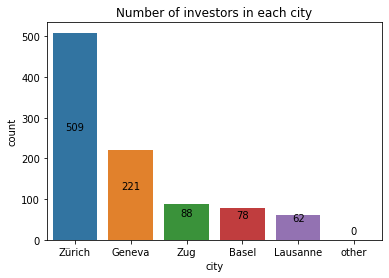

In [34]:
a = sns.barplot(x='city', y='count', data=count_country.reset_index())
#for index, row in count_type.iterrows():
#    a.text(index, row.count, f"{row.percentage}%" , color='black', ha="center")

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2. ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of investors in each city")
plt.savefig("plots/investors/city_ch.pdf")
plt.show()

### Type

In [23]:
count_type = df_ch[['type', 'roles']].groupby(['type']).count() # count number of investors for each type
count_type = count_type.rename(columns={'roles':'count'}) # rename columns
count_type['percentage'] = count_type['count']/count_type['count'].sum()*100
count_type['percentage'] = count_type['percentage'].round(2)
count_type

,count,percentage
type,,
organization,706,49.1
person,732,50.9


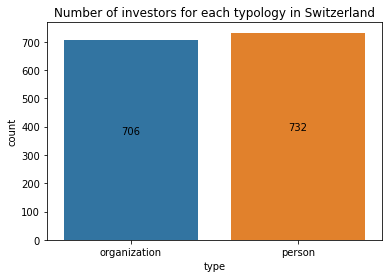

In [24]:
a = sns.barplot(x='type', y='count', data=count_type.reset_index())

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2. ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of investors for each typology in Switzerland")
plt.savefig("plots/investors/count_type_ch.pdf")
plt.show()

### Roles

In [25]:
count_roles = df_ch[['roles', 'type']].groupby(['roles']).count() # count number of investors for each type
count_roles = count_roles.rename(columns={'type':'count'}) # rename columns
count_roles['percentage'] = count_roles['count']/count_type['count'].sum()*100 # find percentage
count_roles['percentage'] = count_roles['percentage'].round(2) # appriximate 

count_roles.head()

,count,percentage
roles,,
"company,investor",51,3.55
investor,1149,79.90
"investor,company",234,16.27
"investor,company,school",2,0.14
"investor,school",2,0.14


In [26]:
len(count_roles)

5

In [27]:
thresold = len_df/10

# delete values too low
sum_low = count_roles['count'][count_roles['count'] < thresold].sum()
per_low = count_roles['percentage'][count_roles['count'] < thresold].sum()
count_roles = count_roles[count_roles['count'] > thresold]
s = pd.DataFrame([[sum_low, per_low, 'other']], columns=['count', 'percentage', 'roles'])
s = s.set_index('roles')
count_roles = count_roles. append(s)
count_roles.head()

,count,percentage
roles,,
investor,1149,79.90
"investor,company",234,16.27
other,55,3.83


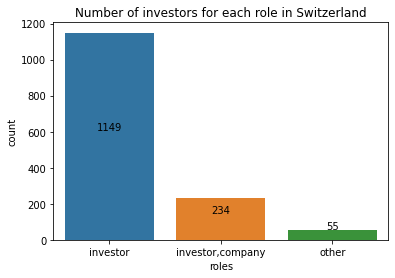

In [28]:
a = sns.barplot(x='roles', y='count', data=count_roles.reset_index())
#for index, row in count_type.iterrows():
#    a.text(index, row.count, f"{row.percentage}%" , color='black', ha="center")

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2. ), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Number of investors for each role in Switzerland")
plt.savefig("plots/investors/count_roles_ch.pdf")
plt.show()